<a href="https://colab.research.google.com/github/jessica8403/TIL/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC

import eli5
from eli5.sklearn import PermutationImportance
import shap

In [ ]:
!pip install eli5 shap

In [9]:
def contours2D(model, x1, x2, h=0.01, **params):
  xx1, xx2 = np.meshgrid(
    np.arange(x1.min() - 0.1, x1.max() + 0.1, h), 
    np.arange(x2.min() - 0.1 , x2.max() + 0.1 , h)
  )

  y = model.predict(np.c_[xx1.flatten(), xx2.flatten()])
  y = y.reshape(xx1.shape)
  result = plt.contourf(xx1, xx2, y, **params)
  return result

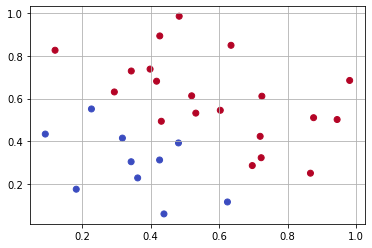

In [6]:
np.random.seed(123)
x = np.random.rand(30,2)
y = np.zeros(len(x))
y[-4/5 + 3/4 * x[:,0] + 1 * x[:,1] > 0] = 1

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

In [8]:
model = LogisticRegression().fit(x, y)

In [10]:
model = LogisticRegression(penalty='none').fit(x, y)

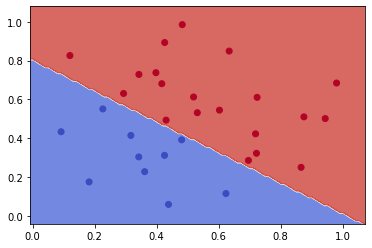

In [11]:
x1, x2 = x[:,0], x[:, 1]
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

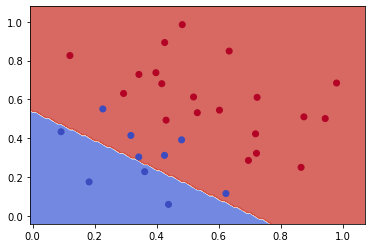

In [12]:
model = SVC(kernel='linear').fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

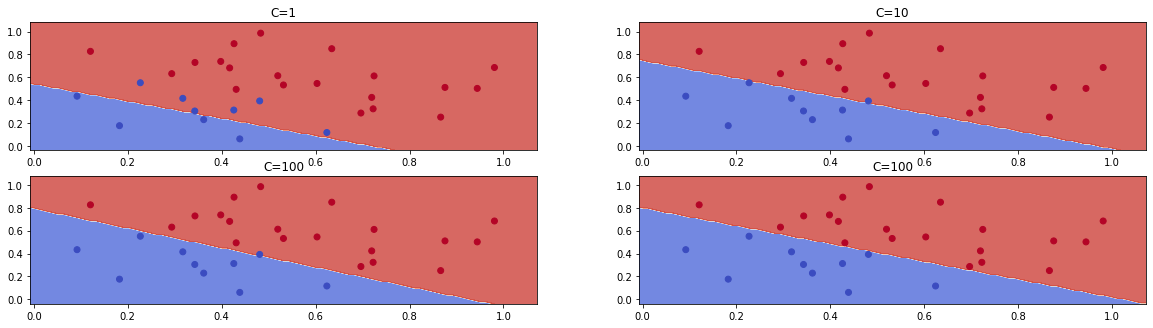

In [14]:
plt.figure( figsize=(20, 8) )

plt.subplot(3, 2, 1)
model = SVC(kernel='linear', C=1).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=1')

plt.subplot(3, 2, 2)
model = SVC(kernel='linear', C=10).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=10')

plt.subplot(3, 2, 3)
model = SVC(kernel='linear', C=100).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=100')

plt.subplot(3, 2, 4)
model = SVC(kernel='linear', C=1000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=100')


plt.show()

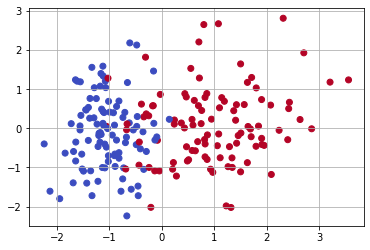

In [21]:
x, y = datasets.make_classification(
  n_samples=200, n_features=2, n_classes=2, random_state=20220214,
  n_informative=1, n_redundant=0, n_clusters_per_class=1,
)

x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

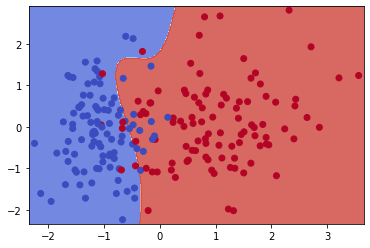

In [22]:
model = SVC(kernel='poly', C=1000000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

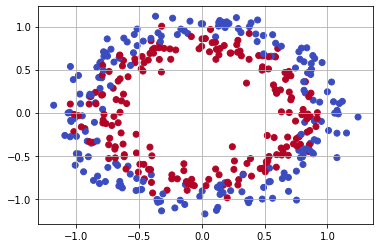

In [23]:
x, y = datasets.make_circles(n_samples=400, noise=0.1, random_state=410)
x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

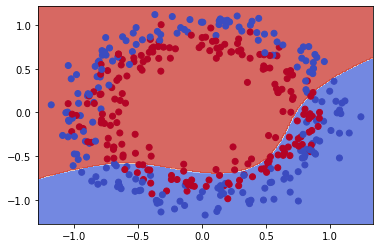

In [24]:
model = SVC(kernel='poly', C=1000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')